In [1]:
import pandas as pd

###### 读取HR数据

In [4]:
file_name = 'd:\HR.csv'
with open(file_name) as f:
    reader = pd.read_csv(f)

In [71]:
reader.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [8]:
reader.mean()
reader["satisfaction_level"].mean()

0.6128335222348166

In [9]:
reader["satisfaction_level"].quantile(q=0.25)

0.44

In [10]:
reader.sum()

satisfaction_level                                                 9191.89
last_evaluation                                                    10740.8
number_project                                                       57042
average_montly_hours                                               3015554
time_spend_company                                                   52470
Work_accident                                                         2169
left                                                                  3571
promotion_last_5years                                                  319
sales                    salessalessalessalessalessalessalessalessaless...
salary                   lowmediummediumlowlowlowlowlowlowlowlowlowlowl...
dtype: object

In [11]:
import scipy.stats as ss
ss.norm

In [12]:
ss.norm.stats(moments='mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [13]:
ss.norm.pdf(0,0)

0.3989422804014327

In [14]:
ss.norm.ppf(0,0)

-inf

In [17]:
ss.norm.cdf(2)-ss.norm.cdf(-2)

0.9544997361036416

###### 初始满意度分析

In [18]:
import numpy as np
sl_s = reader['satisfaction_level']

In [20]:
sl_s[sl_s.isnull()]

Series([], Name: satisfaction_level, dtype: float64)

In [21]:
reader[reader['satisfaction_level'].isnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


In [22]:
sl_s=sl_s.dropna()

In [23]:
sl_s.mean()

0.6128335222348166

In [24]:
sl_s.min()

0.09

In [25]:
sl_s.max()

1.0

In [26]:
sl_s.skew()

-0.4763603412839644

In [27]:
sl_s.kurt()

-0.6708586220574557

In [28]:
np.histogram(sl_s.values, bins=np.arange(0.0,1.1,0.1))

(array([ 195, 1214,  532,  974, 1668, 2146, 1972, 2074, 2220, 2004],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [29]:
import matplotlib.pyplot as plt

###### 下面是对每个人last_evaluation分析

In [30]:
le_s = reader['last_evaluation']

In [31]:
le_s[le_s.isnull()]

Series([], Name: last_evaluation, dtype: float64)

In [32]:
le_s.mean()

0.7161017401159978

In [33]:
le_s.max()
le_s.min()

0.36

In [34]:
le_s.max()

1.0

In [38]:
np.histogram(le_s.values, bins=np.arange(0.3,1.1,0.1))

(array([ 179, 1389, 3395, 2234, 2313, 2814, 2675], dtype=int64),
 array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [39]:
le_s.skew()

-0.02662174986376086

###### 下面是对每个人所做项目的分析

In [40]:
np_s=reader['number_project']

In [41]:
np_s.max()

7

In [42]:
np_s.skew()#偏态分析，大于零证明大部分小于平均值

0.3377056123598222

In [44]:
np_s.value_counts(normalize=True).sort_index() #获得各自的所占比例，并且按编码顺序排序

2    0.159211
3    0.270351
4    0.291019
5    0.184079
6    0.078272
7    0.017068
Name: number_project, dtype: float64

In [45]:
amh_s=reader['average_montly_hours']

In [46]:
print(amh_s.max())
print(amh_s.min())

310
96


In [47]:
amh_s=amh_s[amh_s<amh_s.quantile(0.75)+1.5*(amh_s.quantile(0.75)-amh_s.quantile(0.25))][amh_s>amh_s.quantile(0.25)-1.5*(amh_s.quantile(0.75)-amh_s.quantile(0.25))]

In [48]:
len(amh_s)

14999

In [53]:
np.histogram(amh_s.values, bins=np.arange(amh_s.min(),amh_s.max()+10,10))#左闭右开

(array([ 168,  171,  147,  807, 1153, 1234, 1072,  824,  818,  758,  751,
         738,  856,  824,  987, 1002, 1045,  935,  299,  193,  131,   86],
       dtype=int64),
 array([ 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216,
        226, 236, 246, 256, 266, 276, 286, 296, 306, 316], dtype=int64))

In [54]:
amh_s.value_counts(bins=np.arange(amh_s.min(),amh_s.max()+10,10))#左开右闭

(146.0, 156.0]     1277
(136.0, 146.0]     1159
(256.0, 266.0]     1063
(236.0, 246.0]     1006
(156.0, 166.0]      992
(246.0, 256.0]      987
(126.0, 136.0]      886
(216.0, 226.0]      873
(266.0, 276.0]      860
(166.0, 176.0]      832
(226.0, 236.0]      814
(176.0, 186.0]      813
(186.0, 196.0]      761
(196.0, 206.0]      755
(206.0, 216.0]      731
(276.0, 286.0]      319
(95.999, 106.0]     187
(286.0, 296.0]      164
(116.0, 126.0]      162
(106.0, 116.0]      162
(296.0, 306.0]      128
(306.0, 316.0]       68
Name: average_montly_hours, dtype: int64

In [55]:
tsc_s=reader['time_spend_company']

In [56]:
tsc_s.value_counts().sort_index()

2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

In [57]:
tsc_s.mean()

3.498233215547703

In [58]:
wa_s = reader['Work_accident']

In [59]:
wa_s.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [61]:
wa_s.mean()#事故率

0.1446096406427095

In [62]:
l_s=reader['left']

In [63]:
l_s.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [64]:
l_s.mean()

0.2380825388359224

In [65]:
pl5_s=reader['promotion_last_5years']
pl5_s.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [66]:
s_s=reader['salary']
s_s.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [68]:
s_s.where(s_s=='nme').dropna()

Series([], Name: salary, dtype: object)

In [73]:
ss_s = reader['sales']
ss_s.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64

###### 删除异常值

###### dorpna,where,groupby

In [75]:
reader.groupby('sales').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [76]:
reader.loc[:,["last_evaluation","sales"]].groupby('sales').mean()

,last_evaluation
sales,
IT,0.716830
RandD,0.712122
accounting,0.717718
hr,0.708850
management,0.724000
marketing,0.715886
product_mng,0.714756
sales,0.709717
support,0.723109


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

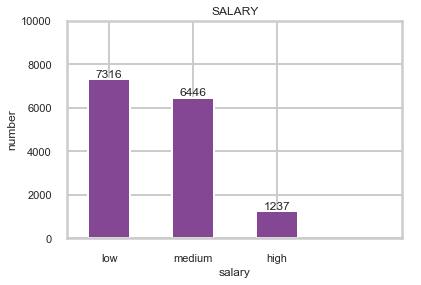

In [94]:
sns.set_style(style="whitegrid")
sns.set_context(context="poster",font_scale=0.5)
sns.set_palette("PRGn")
plt.bar(np.arange(len(reader['salary'].value_counts()))+0.5,reader['salary'].value_counts(),width=0.5)
plt.title("SALARY")
plt.xlabel("salary")
plt.ylabel("number")
plt.xticks(np.arange(len(reader['salary'].value_counts()))+0.5,reader['salary'].value_counts().index)
plt.axis([0,4,0,10000])
for x,y in zip(np.arange(len(reader['salary'].value_counts()))+0.5,reader['salary'].value_counts()):
     plt.text(x,y,y,ha="center", va="bottom")
plt.show()

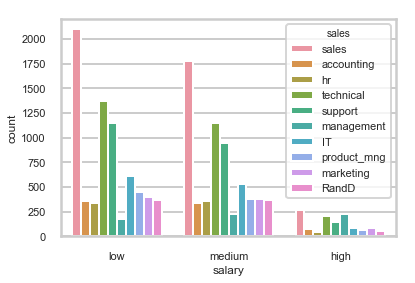

In [96]:
sns.countplot(x='salary',hue='sales',data=reader)

###### 直方图主要是面积，柱状图主要高度

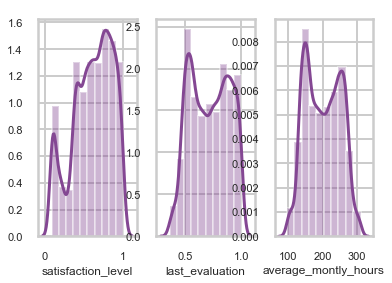

In [103]:
f=plt.figure()
f.add_subplot(1,3,1)
sns.distplot(reader['satisfaction_level'],bins=10,hist=True)#kde是线条，hist是直方图
f.add_subplot(1,3,2)
sns.distplot(reader['last_evaluation'],bins=10)
f.add_subplot(1,3,3)
sns.distplot(reader['average_montly_hours'],bins=10)
plt.show()

###### 箱线图

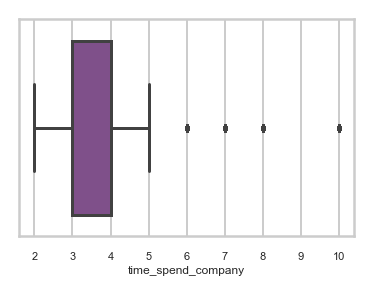

In [107]:
sns.boxplot(x=reader['time_spend_company'],saturation=0.75,whis=1)

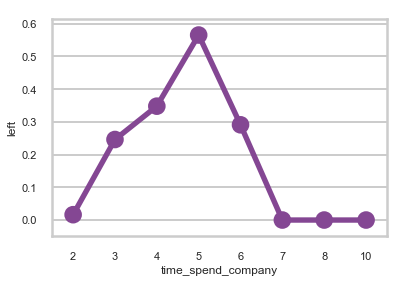

In [108]:
sub_reader=reader.groupby('time_spend_company').mean()
sns.pointplot(sub_reader.index,sub_reader['left'])

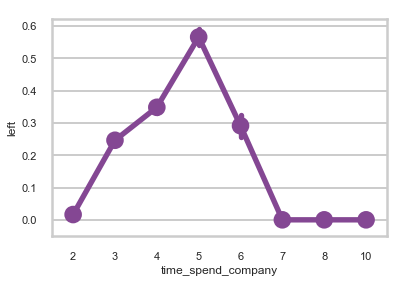

In [111]:
sns.pointplot(x='time_spend_company',y='left',data=reader)#自作图

###### 饼图只有MATPLOTLIB有

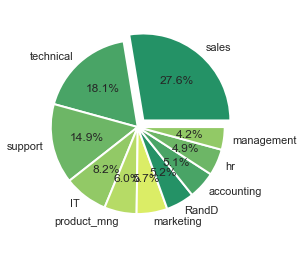

In [121]:
lbs=reader['sales'].value_counts().index
explodes=[0.1 if i=='sales' else 0 for i in lbs]
plt.pie(reader['sales'].value_counts(normalize=True),explode=explodes,labels=lbs,autopct="%1.1f%%", colors=sns.color_palette('summer'))
plt.show()